# Udacity Project: Write a Data Science Blog Post #

## Introduction ##
For this project we will be looking at information on movies from The Movie Database.  We will be following the CRISP-DM process to complete this project.

## Business Understanding ##
The data that will be used for this project comes from the Movie Database (TMDb) which was obtained on Kaggle.com.  This data contains information on over 10,000 movies including popularity, budget, revenue, director and cast. TMDb is a community built movie and TV database which means it is has been built and is updated by it's users.  <br>
I will be exploring this data to answer a number of questions that interest me.
1. What are the top movies by popularity?
2. What are the top movies by revenue?
3. Is there any correlation between popularity and revenue?
4. Is there any correlation between popularity and revenue or voting average?
5. What are the longest and shortest movie runtimes?
6. Does runtime affect the popularity of a movie?

## Data Understanding ##
Here we will gain an understanding of the data necessary to answer the above questions. We will load the data and take a look at the information available.

<b>First we need to import the necessary libraries needed for data wrangling and exploration<b>

In [22]:
import numpy as np
import pandas as pd
import scipy.stats 
#display all float values with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

<b>Read in the csv file and take a look at the first 5 rows<b>

In [23]:
df = pd.read_csv('tmdb_movies_data.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.50,2015,137999939.30,1392445893.00
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.10,2015,137999939.30,348161292.50
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.30,2015,101199955.50,271619025.40
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.50,2015,183999919.00,1902723130.00
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.30,2015,174799923.10,1385748801.00


<b>Check out the shape of the data<b>

In [24]:
df.shape

(10866, 21)

There are 10,866 rows of data and 21 columns

<b>Describe the numeric data (rounding the decimals displayed to two)<b>

In [25]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.00


Finding: We can see from the results above that budget, revenue and runtime which are all columns of interest, all have a minimum value of 0.  After checking the Wikipedia for a number of these movies, it has been determined that the zero values are in fact missing values and not true values.  These are not valid values for these columns and will need to be reomoved during the data preparation stage.

<b>Determine the counts of 0 for budget, revenue and runtime<b>

In [26]:
print(len(df[df['budget_adj'] == 0]))
print(len(df[df['revenue_adj'] == 0]))
print(len(df[df['runtime'] == 0]))

5696
6016
31


Finding: There appears to be a lot of data with the value of zero for budget and revenue.  This reassures me that these are missing values since there are so many.

<b>Check for missing values<b>

In [27]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Finding: The columns we are interested in are popularity, original_title, budget_adj, revenue_adj and runtime.  None of these columns have missing data, therefore we do not need to remove any rows or impute and missing values based on this.

## Data Preparation ##
Preparing the data for analysis takes place at this stage.  For example, removing or imputing missing values, dropping columns, changing column types etc.

<b>We will need to drop the rows of data that have zero for the value of budget, revenue or runtime<b>

In [28]:
#Select the data where budget_adj = 0 or revenue_adj = 0 or runtime = 0 to drop from the dataframe
index_names = df[(df['budget_adj'] == 0) | (df['revenue_adj'] == 0) | (df['runtime'] ==0)].index
df.drop(index_names, inplace=True)

In [29]:
df.shape

(3855, 21)

Finding: This has reduced our data to 3855 records, but we now have data that will answer our questions more accurately.

## Model Data/Results ##

<b>To answer the first two questions, we need to sort the data on popularity and then on revenue in descending order and list the top movies.  I will use the adjusted revenue column which has adjusted all the dollars based on 2010's dollar value.

In [30]:
#Sort based on Popularity
df_pop = df.sort_values(['popularity'], ascending = False).head(10)
df_pop.head(10)[['original_title', 'popularity', 'release_year']]
#df_pop.head(10)[['original_title', 'popularity', 'release_year']].style.hide_index()

,original_title,popularity,release_year
0,Jurassic World,32.99,2015
1,Mad Max: Fury Road,28.42,2015
629,Interstellar,24.95,2014
630,Guardians of the Galaxy,14.31,2014
2,Insurgent,13.11,2015
631,Captain America: The Winter Soldier,12.97,2014
1329,Star Wars,12.04,1977
632,John Wick,11.42,2014
3,Star Wars: The Force Awakens,11.17,2015
633,The Hunger Games: Mockingjay - Part 1,10.74,2014


In [31]:
#Sort based on Revenue Adjusted
df_rev = df.sort_values(['revenue_adj'], ascending = False).head(10)
df_rev['revenue_adj'] = df_rev['revenue_adj'].apply('${:,.2f}'.format)
df_rev.head(10)[['original_title', 'revenue_adj', 'release_year']]
#df_rev.head(10)[['original_title', 'revenue_adj', 'release_year']].style.hide_index()

,original_title,revenue_adj,release_year
1386,Avatar,"$2,827,123,750.00",2009
1329,Star Wars,"$2,789,712,242.00",1977
5231,Titanic,"$2,506,405,735.00",1997
10594,The Exorcist,"$2,167,324,901.00",1973
9806,Jaws,"$1,907,005,842.00",1975
3,Star Wars: The Force Awakens,"$1,902,723,130.00",2015
8889,E.T. the Extra-Terrestrial,"$1,791,694,309.00",1982
8094,The Net,"$1,583,049,536.00",1995
10110,One Hundred and One Dalmatians,"$1,574,814,740.00",1961
4361,The Avengers,"$1,443,191,435.00",2012


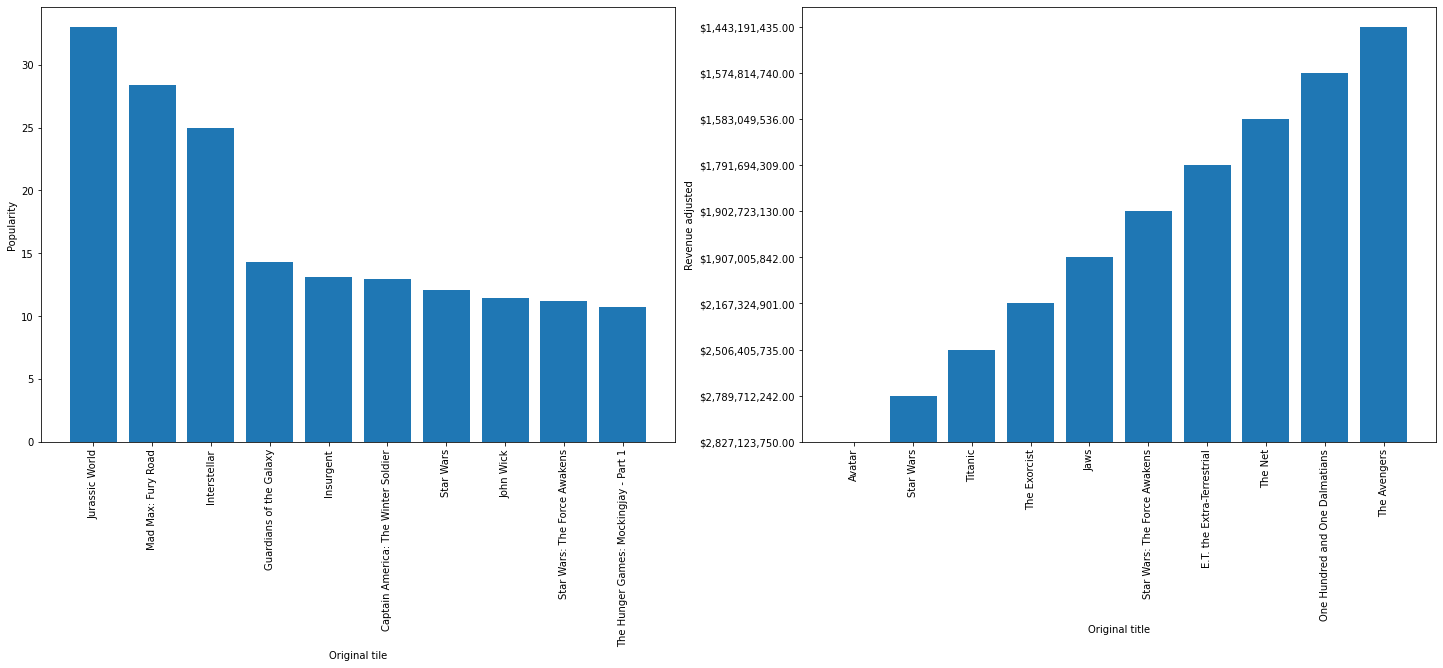

In [39]:
#plot the top 10 movies based on popularity and revenue
plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
plt.bar(df_pop.original_title, df_pop.popularity);
plt.xlabel("Original tile")
plt.xticks(rotation=90) 
plt.ylabel("Popularity")

plt.subplot(1,2,2)
plt.bar(df_rev.original_title, df_rev.revenue_adj);
plt.xlabel("Original title")
plt.xticks(rotation=90)
plt.ylabel("Revenue adjusted");

<b>I decided to also look at the top movies based on the voting average which is votes given by the users.

In [40]:
#Sort based on Voting Average
df_vote = df.sort_values(['vote_average'], ascending = False)
df_vote.head(10)[['original_title', 'vote_average', 'release_year']].style.hide_index()

original_title,vote_average,release_year
The Shawshank Redemption,8.400000,1994
Stop Making Sense,8.400000,1984
The Godfather,8.300000,1972
Whiplash,8.200000,2014
The Godfather: Part II,8.100000,1974
The Dark Knight,8.100000,2008
Pulp Fiction,8.100000,1994
Schindler's List,8.100000,1993
Fight Club,8.100000,1999
Forrest Gump,8.100000,1994


Finding: Looking at the top 10 movies based on popularity and revenue, there are only 2 movies (Star Wars and Star Wars: The Force Awakens) that are listed for both.  It will be interesting to see if there is any correlation between the two as you would expect the popular movies to make more revenue.  I also decided to look at the top movies based on the voting average (TMDb's user voting score).  This also gives us a different list of top 10 movies.

<b>To determine if there is any relationship between popularity and revenue or popularity and voting average, I will take a look at the data and calculate the correlations.

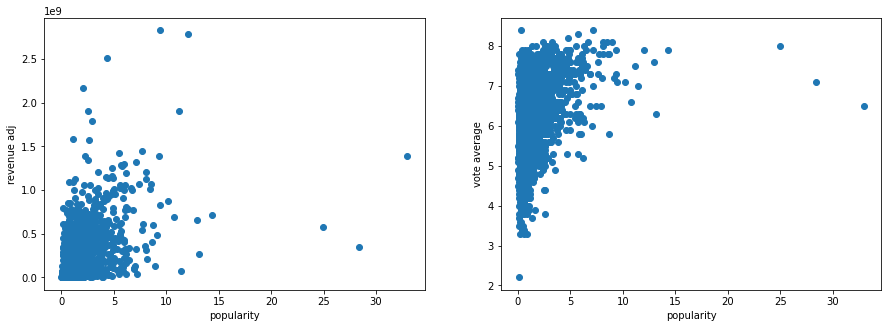

In [41]:
#plot popularity with revenue_adj and voting average to see visually if they appear correlated
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.scatter(df.popularity, df.revenue_adj);
plt.xlabel("popularity")
plt.ylabel("revenue adj")

plt.subplot(1,2,2)
plt.scatter(df.popularity, df.vote_average);
plt.xlabel("popularity")
plt.ylabel("vote average");

Finding: We can see there are a few outliers based on the popularity rating preventing us from seeing if there is any clear correlation.  

<b>I will remove these three outliers to see if this helps.

In [42]:
#Drop the three popularity values above 20 from the data
index_names = df[(df['popularity'] > 20)].index
df_scatter = df.drop(index_names)

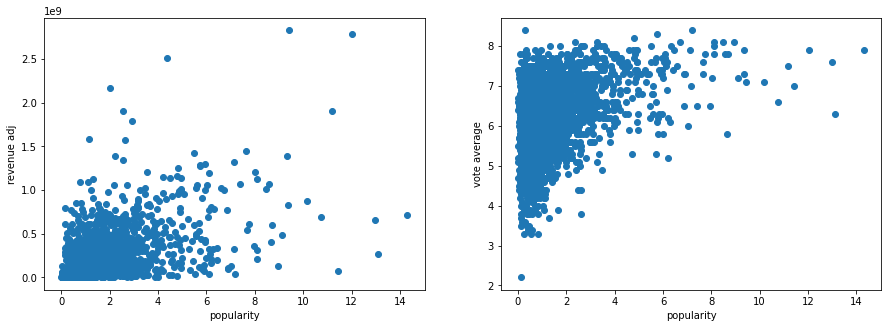

In [43]:
#Replot popularity with revenue_adj and voting average to see visually if they appear correlated
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.scatter(df_scatter.popularity, df_scatter.revenue_adj);
plt.xlabel("popularity")
plt.ylabel("revenue adj")

plt.subplot(1,2,2)
plt.scatter(df_scatter.popularity, df_scatter.vote_average);
plt.xlabel("popularity")
plt.ylabel("vote average");

<b>Next I will calculate the Spearman correlation (based on ranks) to see what the actual correlation coefficient is.

In [44]:
#calculate Spearman's rho correlation using a scipy function
print(scipy.stats.spearmanr(df_scatter["popularity"], df_scatter["revenue_adj"]))
print(scipy.stats.spearmanr(df_scatter["popularity"], df_scatter["vote_average"]))

SpearmanrResult(correlation=0.607623713698522, pvalue=0.0)
SpearmanrResult(correlation=0.30860531054730167, pvalue=8.872487286596436e-86)


Finding: Removing the three outliers did improve the plots, but it still doesn't appear that these features are strongly correlated.  The Spearman correlation coefficient is 0.61 between revenue and popularity, showing some positive correlation but not strongly correlated.  There is even less correlation between the voting average and popularity with a coefficient of 0.31.  So from this I would conclude that revenue appears to have some influence on the popularity score but that there are other factors that influence it.

<b>Next I will look at the movies with the longest and shortest runtimes.

In [45]:
#Sort based on Runtime
df_rev = df.sort_values(['runtime'], ascending = False)
df_rev.head(10)[['original_title', 'runtime', 'release_year']]

,original_title,runtime,release_year
2107,Carlos,338,2010
10443,Cleopatra,248,1963
7332,Heaven's Gate,219,1980
9850,Lawrence of Arabia,216,1962
5065,Gods and Generals,214,2003
3110,Jodhaa Akbar,213,2008
8282,Malcolm X,202,1992
4949,The Lord of the Rings: The Return of the King,201,2003
9758,The Godfather: Part II,200,1974
10716,The Greatest Story Ever Told,199,1965


In [46]:
df_rev.tail(10)[['original_title', 'runtime', 'release_year']]

,original_title,runtime,release_year
4966,The Jungle Book 2,72,2003
4000,Return to Never Land,72,2002
10093,Paris is Burning,71,1990
9462,The Land Before Time,69,1988
7020,9 Songs,66,2004
3424,Winnie the Pooh,63,2011
3818,Louis C.K.: Live at the Beacon Theater,62,2011
3239,Dr. Horrible's Sing-Along Blog,42,2008
8005,Mickey's Christmas Carol,26,1983
5162,Kid's Story,15,2003


<b>Let's see if runtime affects the popularity of a movie

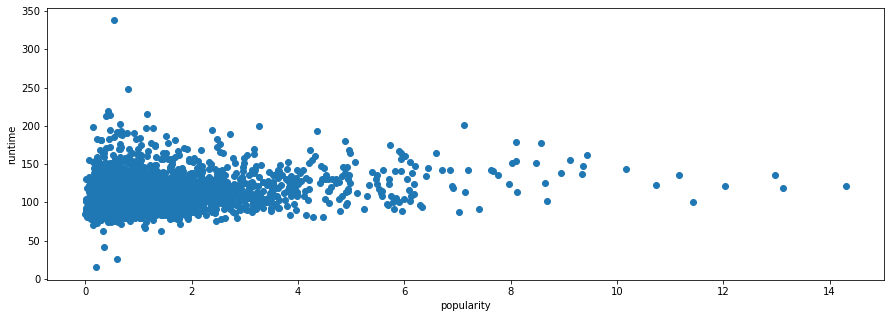

In [47]:
#plot popularity with revenue_adj and voting average to see visually if they appear correlated
plt.figure(figsize = (15,5))

plt.scatter(df_scatter.popularity, df_scatter.runtime);
plt.xlabel("popularity")
plt.ylabel("runtime");

In [48]:
#calculate Spearman's rho correlation using a scipy function
print(scipy.stats.spearmanr(df_scatter["popularity"], df_scatter["runtime"]))

SpearmanrResult(correlation=0.19875395508443727, pvalue=1.2968018561189533e-35)


Finding: It appears runtime very little influence on the popularity score of a movie!

## Conclusion ##
It doesn't appear that any particular feature in this data strongly influences the popularity score that TMDb has associated with each movie.  Everyone is different and has different likes, so the popularity rating of one site or one person will not be the same for the next person.  The popularity score might be a good start to select your next movie to watch rather than picking one out at random, but there is no guarantee that you will also like the movie just because it has a high popularity score!  Even Siskel and Ebert, who were two well known film critics didn't agree on everything!